In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform


In [2]:
from ucimlrepo import fetch_ucirepo 
  

heart_disease = fetch_ucirepo(id=45) 

df = heart_disease.data.original


In [3]:

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

C:\Users\PC\AppData\Local\Temp\ipykernel_15124\4267255269.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

# EDA 

### age column

In [5]:
df['age'].value_counts().isna().sum()

np.int64(0)

In [6]:
df['age'].astype(np.int64)

0      63
1      67
2      67
3      37
4      41
       ..
298    45
299    68
300    57
301    57
302    38
Name: age, Length: 303, dtype: int64

In [7]:
df['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [8]:
df["age"].astype(int)

0      63
1      67
2      67
3      37
4      41
       ..
298    45
299    68
300    57
301    57
302    38
Name: age, Length: 303, dtype: int64

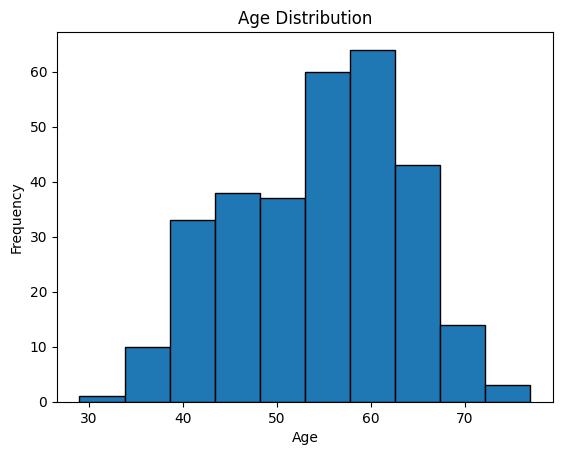

In [9]:
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### sex column

In [10]:
df['sex'].value_counts().isna().sum()   

np.int64(0)

In [11]:
df['sex'].astype(np.int64)

0      1
1      1
2      1
3      1
4      0
      ..
298    1
299    1
300    1
301    0
302    1
Name: sex, Length: 303, dtype: int64

In [12]:
df['sex'].describe()

count    303.000000
mean       0.679868
std        0.467299
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

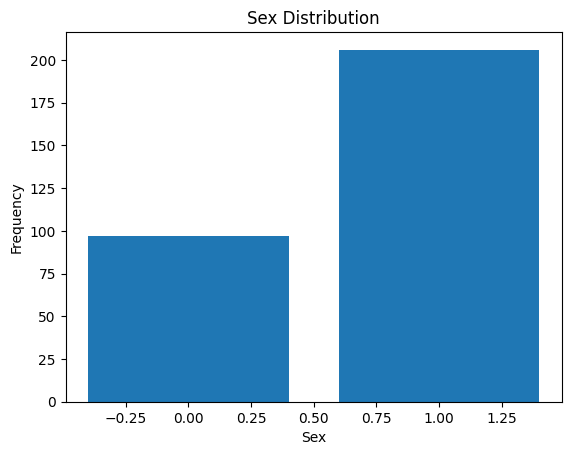

In [13]:
plt.bar(df['sex'].value_counts().index, df['sex'].value_counts().values)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

### cp (chest pain type) column


In [14]:
df['cp'].value_counts().isna().sum()    

np.int64(0)

In [15]:
df['cp'].value_counts()

cp
4    144
3     86
2     50
1     23
Name: count, dtype: int64

In [16]:
df['cp'].astype(np.int64)

0      1
1      4
2      4
3      3
4      2
      ..
298    1
299    4
300    4
301    2
302    3
Name: cp, Length: 303, dtype: int64

In [17]:
df['cp'].describe()

count    303.000000
mean       3.158416
std        0.960126
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: cp, dtype: float64

([<matplotlib.patches.Wedge at 0x25f1c60c550>,
 [Text(0.08545211008447422, 1.096675857709155, '4'),
  Text(-0.8151659691308484, -0.7385827257463887, '3'),
  Text(0.5986247673245755, -0.9228479766167329, '2'),
  Text(1.0688704764987331, -0.2598382274981324, '1')],
 [Text(0.046610241864258654, 0.5981868314777209, '47.5%'),
  Text(-0.44463598316228087, -0.4028633049525756, '28.4%'),
  Text(0.3265226003588593, -0.503371623609127, '16.5%'),
  Text(0.5830202599083999, -0.14172994227170857, '7.6%')])

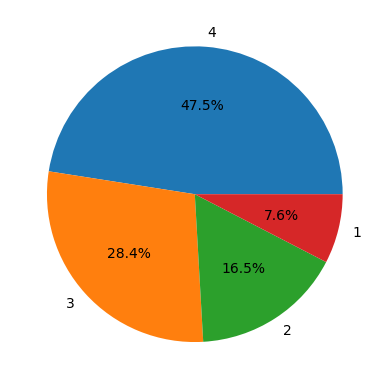

In [18]:
plt.pie(df['cp'].value_counts().values, labels=df['cp'].value_counts().index, autopct='%1.1f%%')    

        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
        

### trestbps: resting blood pressure (in mm Hg on admission to the hospital) column

In [19]:
df['trestbps'].isna().sum()  

np.int64(0)

In [20]:
df['trestbps'].describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [21]:
df['trestbps'].isna().sum()

np.int64(0)

{'whiskers': [<matplotlib.lines.Line2D at 0x25f1c654d50>,
 'caps': [<matplotlib.lines.Line2D at 0x25f1c656550>,
 'boxes': [<matplotlib.lines.Line2D at 0x25f1a56c8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x25f1c657d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x25f1c6648d0>],
 'means': []}

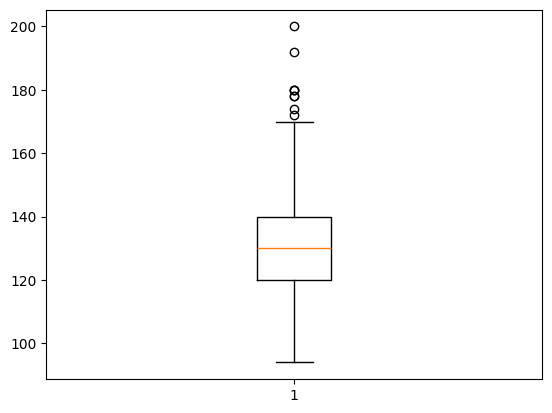

In [22]:
plt.boxplot(df['trestbps'])

In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper and lower bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Replace outliers with upper or lower limit (capping)
df['trestbps'] = np.where(df['trestbps'] > upper_limit, upper_limit,
                         np.where(df['trestbps'] < lower_limit, lower_limit, df['trestbps']))


(array([ 7., 13., 32., 56., 63., 34., 44., 25., 14., 15.]),
 array([ 94. , 101.6, 109.2, 116.8, 124.4, 132. , 139.6, 147.2, 154.8,
        162.4, 170. ]),
 <BarContainer object of 10 artists>)

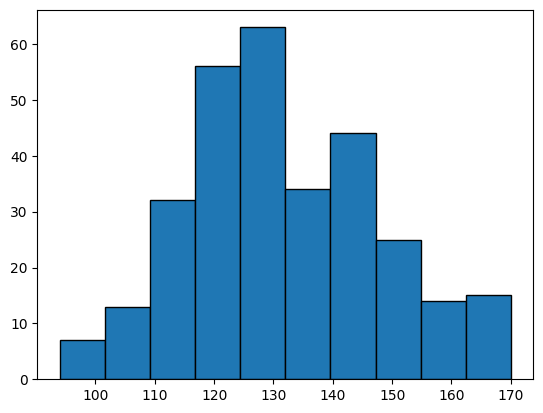

In [24]:
plt.hist(df['trestbps'], bins=10, edgecolor='black')

### chol (serum cholestoral in mg/dl) column

In [26]:
df['chol'].describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x25f1c737a10>,
 'caps': [<matplotlib.lines.Line2D at 0x25f1c744d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x25f1c61bb50>],
 'medians': [<matplotlib.lines.Line2D at 0x25f1c7460d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25f1c746a10>],
 'means': []}

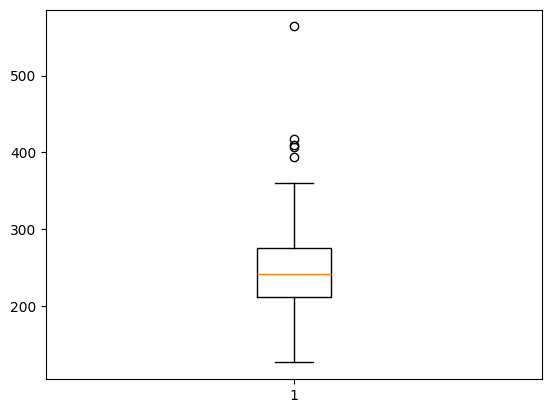

In [27]:
plt.boxplot(df['chol'])

In [28]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper and lower bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Replace outliers with upper or lower limit (capping)
df['chol'] = np.where(df['chol'] > upper_limit, upper_limit,np.where(df['chol'] < lower_limit, lower_limit, df['chol']))


(array([ 5.,  9., 35., 56., 65., 51., 33., 29., 12.,  8.]),
 array([126. , 150.5, 175. , 199.5, 224. , 248.5, 273. , 297.5, 322. ,
        346.5, 371. ]),
 <BarContainer object of 10 artists>)

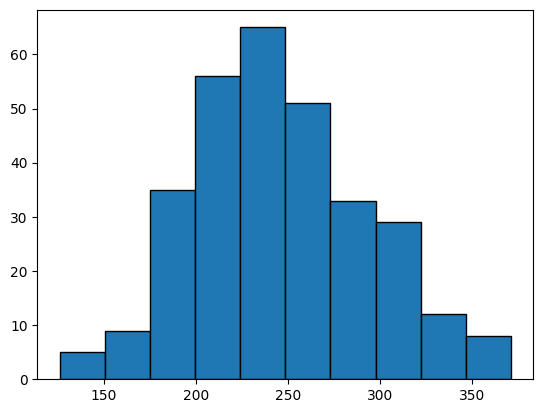

In [29]:
plt.hist(df['chol'], bins=10, edgecolor='black')

### fbs (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) column

In [30]:
df['fbs'].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [31]:
df['fbs'].isna().sum()  

np.int64(0)

In [32]:
df['fbs'].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

(array([258.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  45.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

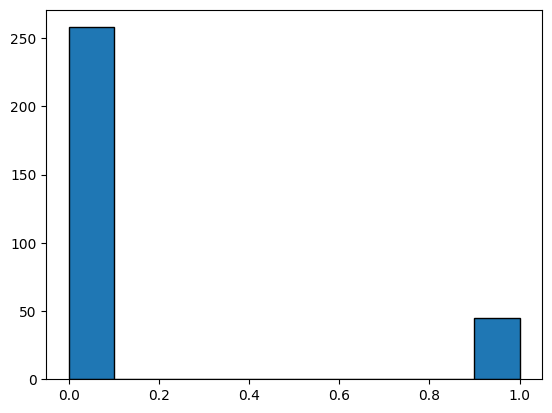

In [33]:
plt.hist(df['fbs'], bins=10, edgecolor='black')

### restecg (resting electrocardiographic results) column

In [34]:
df['restecg'].describe()

count    303.000000
mean       0.990099
std        0.994971
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: restecg, dtype: float64

In [35]:
df['restecg'].isna().sum()

np.int64(0)

In [36]:
df['restecg'].value_counts()

restecg
0    151
2    148
1      4
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x25f1c6dcd10>,
 [Text(0.005702386188599272, 1.099985219351495, '0'),
  Text(-0.051304162259203735, -1.0988029318011858, '2'),
  Text(1.0990541422312996, -0.04560693416819738, '1')],
 [Text(0.0031103924665086932, 0.599991937828088, '49.8%'),
  Text(-0.027984088505020217, -0.5993470537097377, '48.8%'),
  Text(0.5994840775807089, -0.024876509546289477, '1.3%')])

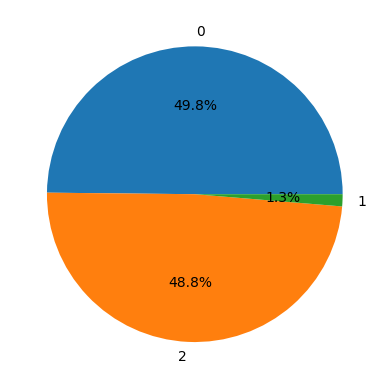

In [37]:
plt.pie(df['restecg'].value_counts().values, labels=df['restecg'].value_counts().index, autopct='%1.1f%%')    

        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

### thalach (maximum heart rate achieved) column

In [38]:
df['thalach'].describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [39]:
df['thalach'].isna().sum()

np.int64(0)

{'whiskers': [<matplotlib.lines.Line2D at 0x25f1c7da650>,
 'caps': [<matplotlib.lines.Line2D at 0x25f1c7dba50>,
 'boxes': [<matplotlib.lines.Line2D at 0x25f1c7d9c10>],
 'medians': [<matplotlib.lines.Line2D at 0x25f1c7e8b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x25f1c7e9590>],
 'means': []}

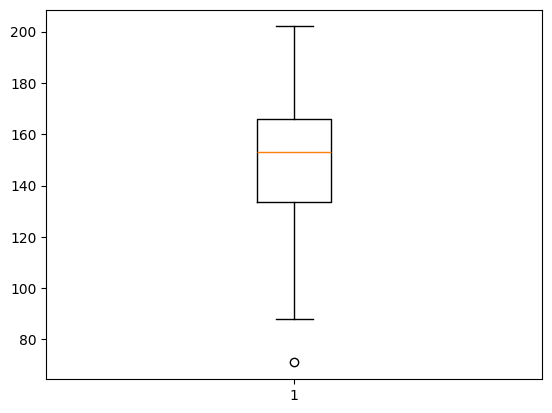

In [40]:
plt.boxplot(df['thalach'])

(array([ 1.,  6., 11., 26., 35., 53., 78., 62., 26.,  5.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <BarContainer object of 10 artists>)

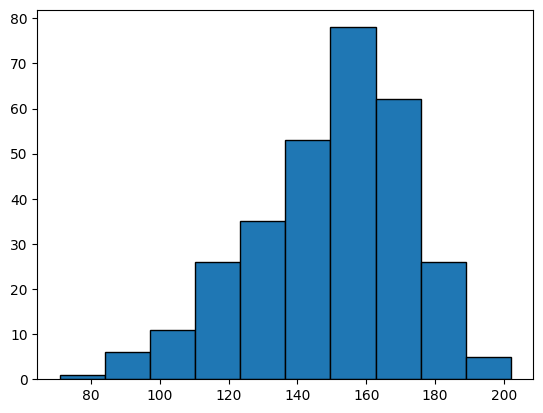

In [41]:
plt.hist(df['thalach'], bins=10, edgecolor='black')

### exang ( exercise induced angina (1 = yes; 0 = no) ) column

In [42]:
df['exang'].describe()  

count    303.000000
mean       0.326733
std        0.469794
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exang, dtype: float64

In [43]:
df['exang'].isna().sum()

np.int64(0)

In [44]:
df['exang'].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

(array([204.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  99.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

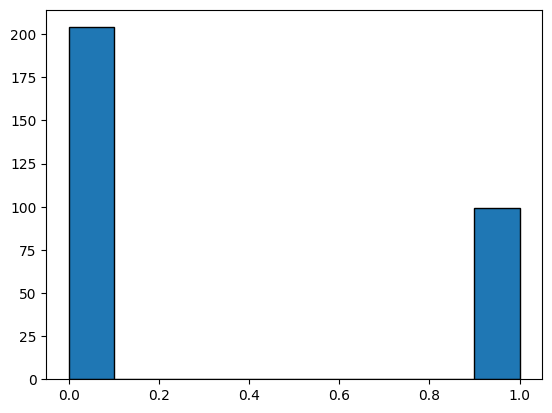

In [45]:
plt.hist(df['exang'], bins=10, edgecolor='black') 

### oldpeak (ST depression induced by exercise relative to rest) column 

In [46]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [47]:
df['oldpeak'].isna().sum()

np.int64(0)

{'whiskers': [<matplotlib.lines.Line2D at 0x25f1a53dc10>,
 'caps': [<matplotlib.lines.Line2D at 0x25f1a54b890>,
 'boxes': [<matplotlib.lines.Line2D at 0x25f1a53f590>],
 'medians': [<matplotlib.lines.Line2D at 0x25f1a549310>],
 'fliers': [<matplotlib.lines.Line2D at 0x25f1a5485d0>],
 'means': []}

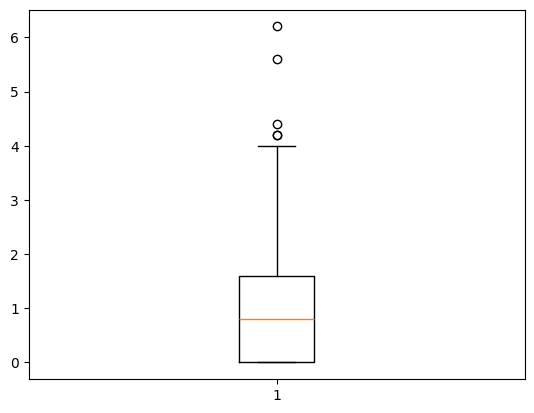

In [48]:
plt.boxplot(df['oldpeak'])

In [49]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper and lower bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Replace outliers with upper or lower limit (capping)
df['oldpeak'] = np.where(df['oldpeak'] > upper_limit, upper_limit,
                         np.where(df['oldpeak'] < lower_limit, lower_limit, df['oldpeak']))


(array([121.,  29.,  49.,  19.,  26.,  19.,  14.,   7.,   6.,  13.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

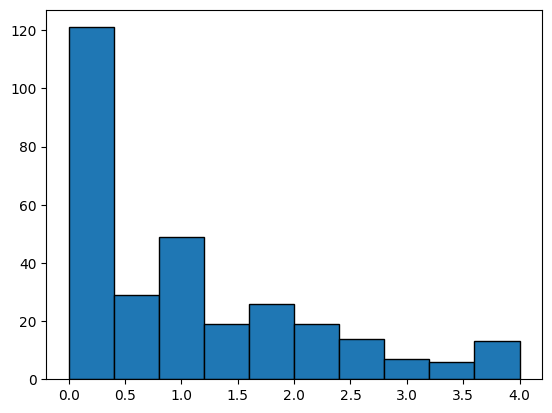

In [50]:
plt.hist(df['oldpeak'], bins=10, edgecolor='black')

### slope (the slope of the peak exercise ST segment) column


In [51]:
df['slope'].describe()

count    303.000000
mean       1.600660
std        0.616226
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: slope, dtype: float64

In [52]:
df['slope'].isna().sum()    

np.int64(0)

In [53]:
df['slope'].value_counts()

slope
1    142
2    140
3     21
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x25f1cafda50>,
 [Text(0.10817354033044684, 1.0946682078019703, '1'),
  Text(-0.34208707841634195, -1.0454551309265125, '2'),
  Text(1.0740282451082876, -0.23762013532024645, '3')],
 [Text(0.05900374927115281, 0.5970917497101655, '46.9%'),
  Text(-0.18659295186345923, -0.5702482532326432, '46.2%'),
  Text(0.585833588240884, -0.12961098290195258, '6.9%')])

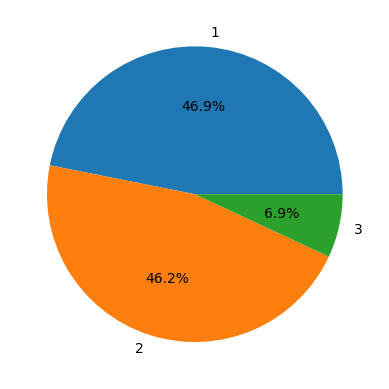

In [54]:
plt.pie(df['slope'].value_counts().values, labels=df['slope'].value_counts().index, autopct='%1.1f%%')

### ca (number of major vessels (0-3) colored by flourosopy) column 

In [55]:
df['ca'].describe()

count    299.000000
mean       0.672241
std        0.937438
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ca, dtype: float64

In [56]:
df['ca'].isna().sum()

np.int64(4)

In [57]:
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [58]:
df['ca'] = df['ca'].fillna(df['ca'].mode()[0]).astype(np.float64)
    

([<matplotlib.patches.Wedge at 0x25f1db53310>,
 [Text(-0.32033623561759306, 1.0523234750542962, '0.0'),
  Text(-0.331229243419919, -1.0489457508867979, '1.0'),
  Text(0.7594621889362801, -0.7957494477384914, '2.0'),
  Text(1.0764343071031552, -0.2264711515653824, '3.0')],
 [Text(-0.1747288557914144, 0.5739946227568888, '59.4%'),
  Text(-0.18067049641086488, -0.5721522277564351, '21.5%'),
  Text(0.41425210305615273, -0.43404515331190435, '12.5%'),
  Text(0.58714598569263, -0.1235297190356631, '6.6%')])

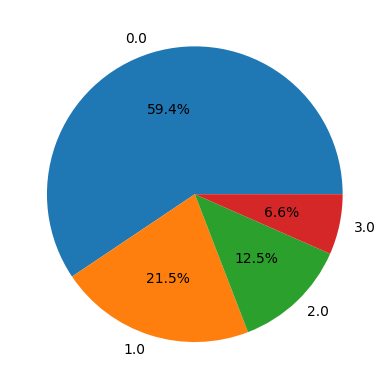

In [59]:
plt.pie(df['ca'].value_counts().values, labels=df['ca'].value_counts().index, autopct='%1.1f%%')

### thal  (thal: 3 = normal; 6 = fixed defect; 7 = reversable defect)  column

In [60]:
df['thal'].describe()

count    301.000000
mean       4.734219
std        1.939706
min        3.000000
25%        3.000000
50%        3.000000
75%        7.000000
max        7.000000
Name: thal, dtype: float64

In [61]:
df['thal'].isna().sum()

np.int64(2)

In [62]:
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64

In [63]:
df['thal'] = df['thal'].fillna(df['thal'].mode()[0]).astype(np.float64)


([<matplotlib.patches.Wedge at 0x25f1dba0ed0>,
 [Text(-0.18726803036256398, 1.083942196246703, '3.0'),
  Text(-0.017107070045787525, -1.0998669683895634, '7.0'),
  Text(1.0808988028529034, -0.20410237135114406, '6.0')],
 [Text(-0.10214619837958035, 0.591241197952747, '55.4%'),
  Text(-0.009331129115884103, -0.5999274373033981, '38.6%'),
  Text(0.5895811651924927, -0.11132856619153313, '5.9%')])

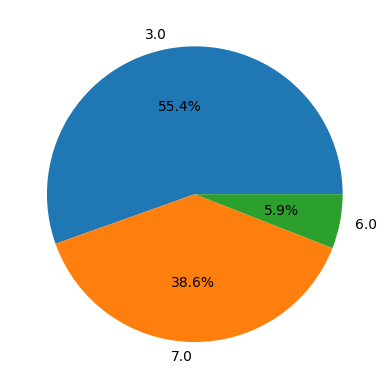

In [64]:
plt.pie(df['thal'].value_counts().values, labels=df['thal'].value_counts().index, autopct='%1.1f%%')